In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
raw_dir = ['../dataset/mp_data/voltage_2020_08_05.csv']
target_dir = ['../regression/result/dnn_2020_08_29/32']
prefix = 'H_test_krr_best_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,5.772298,2.990614,3479,-2.781684,2.781684,P(W3O10)4,K3P(W3O10)4,0.069532,93.498838
1,5.900505,3.342664,3432,-2.557841,2.557841,P(W3O10)4,Rb3P(W3O10)4,0.041905,95.978081
2,2.247873,4.411753,1023,2.163880,2.163880,Cr(PO3)3,LiCr(PO3)3,0.006192,99.384597
3,5.371883,3.457453,400,-1.914430,1.914430,Li2Fe2CoO6,Li3Fe2CoO6,0.014480,98.572706
4,5.224907,3.423149,1680,-1.801758,1.801758,Li3Fe7O12,Li4Fe7O12,0.015093,98.513103
5,5.034852,3.235764,531,-1.799088,1.799088,Li7Sc9Fe(SiO3)20,Li10Sc9Fe(SiO3)20,0.005443,99.458626
6,1.893173,3.557989,3438,1.664816,1.664816,FeF3,RbFeF3,0.257217,79.540781
7,1.436648,2.944138,2641,1.507490,1.507490,Na2SrVP2O9,Na2SrLiVP2O9,0.066728,93.744630
8,2.210665,3.716620,2462,1.505956,1.505956,Fe5Sb(PO4)6,Li4Fe5Sb(PO4)6,0.049317,95.300102
9,1.037447,2.528036,2173,1.490589,1.490589,LiTiCrO4,Li2TiCrO4,0.008960,99.111948


In [4]:
df_high_vol = concat_data[concat_data['test_ground_truth'] > 3.5] 
print('voltage > 3.5 case MAE') 
print(mean_absolute_error(df_high_vol['test_ground_truth'].values, df_high_vol['test_pred'].values)) 
print('original MAE')
print(mean_absolute_error(concat_data['test_ground_truth'].values, concat_data['test_pred'].values))

voltage > 3.5 case MAE
0.3549826968825188
original MAE
0.3645558912012908


In [5]:
# see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
#     xy_lim = [min_val - margin, max_val + margin]
    xy_lim = [0, 7.0]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

  Unnamed: 0   R2_test  MAE_test  RMSE_test
0       test  0.790078  0.364556   0.496526


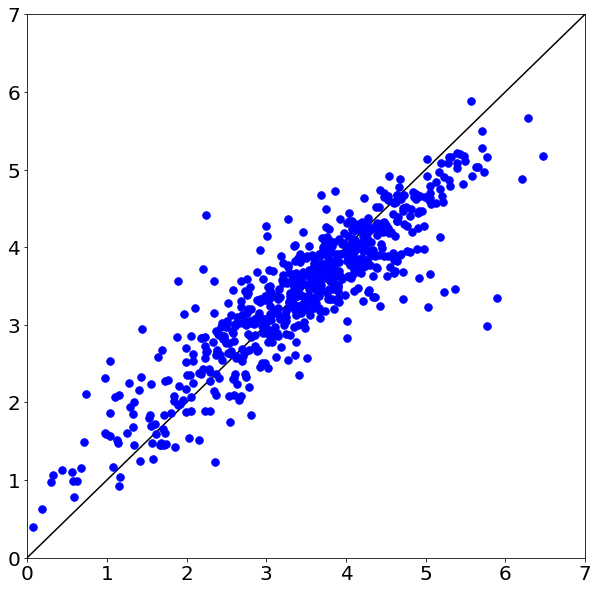

In [6]:
yy_plot(target_dir[0], prefix + 'yyplot')